In [1]:
from dynamics import base, creator, model
from dynamics.asset import Asset
from dynamics.tools import Body, kinectic, potentialGrav, rotation, solution
from dynamics.tools.solver import euler, improved_euler, RK2, RK4

In [2]:
simulation = base.Simulation()

# body = creator.create('body', Body, **{'mass':1, 'drag_coeff':0.2, 'length':1})
body = creator.create('body', Body, **{'mass':1, 'drag_coeff':0.3, 'length':1})
sol = solution.Solution(disp_0=3.0, velo_0=0)
asset = Asset(**{'name': 'mass', 'var_name': 'theta', 'component': body, 'motion_func': rotation, 'solution': sol})
sol_1 = solution.Solution(disp_0=0, velo_0=0)
asset_1 = Asset(**{'name': 'mass1', 'var_name': 'theta1', 'component': body, 'motion_func': rotation, 'solution': sol_1, 'connection': asset})

simulation.register('model', model.Model([asset, asset_1]))
simulation.register('solver', RK4)

In [3]:
simulation.model.acceleration()[1]

1.0*theta1ddot(t) - 0.3*theta1dot(t) + 1.0*thetaddot(t)*cos(theta(t) - theta1(t)) - 1.0*thetadot(t)**2*sin(theta(t) - theta1(t)) - 0.3*thetadot(t)*cos(theta(t) - theta1(t)) - 9.80665*sin(theta1(t))

In [4]:
simulation.set_paramters(time_step=2.5e-3, time_end=2.5)
simulation.run()

100%|██████████| 1000/1000 [01:52<00:00,  8.93it/s]


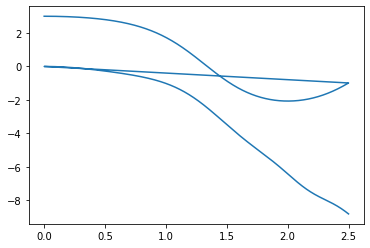

In [5]:
import matplotlib.pyplot as plt 
import numpy as np
solu = simulation.results
plt.plot(solu['time'], solu['displacement'])
plt.show()